Импорт библиотек

In [79]:
import pandas as pd
from math import sqrt
import matplotlib.pyplot as plt

Создание функций, которые будут использоваться во время выполнения заданий

In [80]:
def coef_reg(x, y):
    n = len(x)
    a = (n * sum(x * y) - sum(x) * sum(y)) / (n * (sum([i ** 2 for i in x])) - sum(x) ** 2)
    b = 1 / n * sum(y) - a / n * sum(x)
    return a, b

def func(base, name_X, name_Y,name_graf,with_line = None):
    a, b = coef_reg(base[name_X], base[name_Y])

    if with_line == 1:
        line = [a * i + b for i in base[name_X]]
        plt.plot(base[name_X], line, 'r')
    else:
        print('Кф корреляции равен: ', base.corr().to_dict()[name_X][name_Y])
        print(f'Регрессионная модель: y = {a}*x + {b}')
    plt.scatter(base[name_X], base[name_Y])
    plt.title(name_graf)
    plt.xlabel(name_X)
    plt.ylabel(name_Y)
    plt.show()


# Задание 1. Исследование связей между двумя признаками.
## Условие задачи:
По 20 туристическим фирмам были установлены затраты на рекламную
кампанию и количество туристов, воспользовавшихся после ее проведения услугами каждой фирмы.
Определить коэффициент корреляции между исследуемыми признаками.

### Создадим DataFrame со значениями таблицы


In [81]:
pred_base = {
    'Затраты на рекламу,y.e.(Xi)': [5, 5, 7, 8, 9, 10, 11, 12, 13, 14, 15, 15, 16, 17, 18, 18, 19, 20, 20, 21],
    'Количество туристов воспользовавшихся услугами фирмы (Yi)': [720, 750, 800, 820, 800, 880, 950, 820, 900, 950, 920,
                                                                  980, 980, 970, 980, 1010, 1100, 1100, 1115, 1100]
}
base = pd.DataFrame(pred_base)
base

,"Затраты на рекламу,y.e.(Xi)",Количество туристов воспользовавшихся услугами фирмы (Yi)
0,5,720
1,5,750
2,7,800
3,8,820
4,9,800
5,10,880
6,11,950
7,12,820
8,13,900
9,14,950


### Рассчитаем корреляцию

In [82]:
print(
    'Коэффициент корреляции между затратами на рекламу и количеством туристов воспользовавшихся услугами фирмы составляет: ',
    base.corr().to_dict()['Затраты на рекламу,y.e.(Xi)']['Количество туристов воспользовавшихся услугами фирмы (Yi)'])

Коэффициент корреляции между затратами на рекламу и количеством туристов воспользовавшихся услугами фирмы составляет:  0.9523045897895136


По таблице ![Таблица корреляции](image/img.png)
МЫ ДЕЛАЕМ ВЫВОД, ЧТО КОРРЕЛЯЦИЯ ОЧЕНЬ СИЛЬНАЯ

Оцените значимость коэффициента корреляции. С этой целью рассматриваются две гипотезы.
Основная Н0: xy=0 и альтернативная Н1: xy≠0. Для проверки гипотезы Н0 рассчитайте t-
статистику Стьюдента по формуле, указанной выше в ячейке С24. В нашем случае число степеней
свободы ν = n-2=20-2 = 18 и формула будет следующей: =C23*КОРЕНЬ(20-2)/КОРЕНЬ(1-(C23*C23))
5. Сравните полученное значение с критическим значением tν,α распределения Стьюдента. (При ν
=18 и доверительной вероятности α = 0,05, tν,α,табл = 1,734). Сделайте вывод о наличии связи между
исследуемыми величинами.

In [83]:
res = base.corr().to_dict()['Затраты на рекламу,y.e.(Xi)'][
          'Количество туристов воспользовавшихся услугами фирмы (Yi)'] * sqrt(20 - 2) / sqrt(
    1 - base.corr().to_dict()['Затраты на рекламу,y.e.(Xi)'][
        'Количество туристов воспользовавшихся услугами фирмы (Yi)'] ** 2)
print('t-статистика Стюдента равна: ', res)

t-статистика Стюдента равна:  13.240367764107233


In [84]:
print('для нашей задачи, что бы отвергнуть нулевую гипотезу нужно, чтобы критерий стьюдента был:\n',
      'либо больше 1,734\n'
      'либо меньше -1,734\n')
if res > 1.734:
    print(
        'Наше значение больше порогового интервала- следовательно мы отвергаем нулевую гипотезу в сторону альтернативной')
elif res < -1.734:
    print(
        'Наше значение меньше порогового интервала- следовательно мы отвергаем нулевую гипотезу в сторону альтернативной')
else:
    print(
        'Наше значение входит в  пороговый интервала- следовательно мы не отвергаем нулевую гипотезу в сторону альтернативной')


для нашей задачи, что бы отвергнуть нулевую гипотезу нужно, чтобы критерий стьюдента был:
 либо больше 1,734
либо меньше -1,734

Наше значение больше порогового интервала- следовательно мы отвергаем нулевую гипотезу в сторону альтернативной


Вычислим коэфиценты регрессии - a,b

 # Задание 2. Построение регрессионной модели.

Выведем получившиеся кф линейной регрессии

In [85]:
a, b = coef_reg(base['Затраты на рекламу,y.e.(Xi)'], base['Количество туристов воспользовавшихся услугами фирмы (Yi)'])
print(f'y = {a}*x + {b}')


y = 22.506852096233885*x + 625.0314688864074


Построим графическую интерпритацию

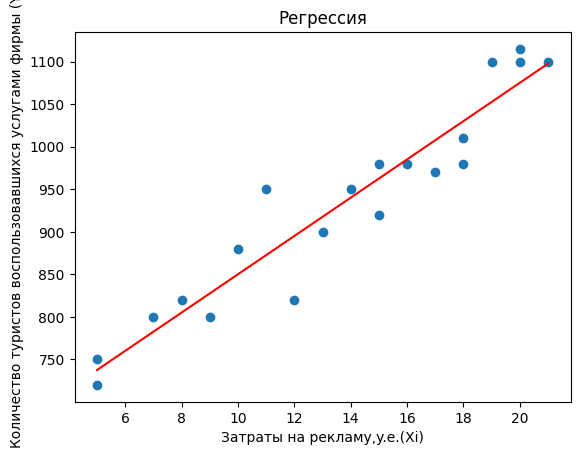

In [86]:
func(base, 'Затраты на рекламу,y.e.(Xi)', 'Количество туристов воспользовавшихся услугами фирмы (Yi)','Регрессия',with_line=1)


# Задание 3. Выбор наиболее точной модели связи.
Условие задачи. Исследуется зависимость дозы облучения от толщины слоя защитного
материала. Имеются результаты 10 экспериментов (см. рис.6).
Имеются основания предполагать, что зависимость дозы (функция) от толщины
слоя материала (аргумент) может выражаться одним из следующих уравнений:
- Y=A0 + A1*X (линейная модель);
- Y=A0*X**1A(степенная модель);
- Y=A0+A1/X (гиперболическая модель).
Выберите наиболее точную модель и определите ее коэффициенты.

In [87]:
pred_base2 = {
    'Толщина слоя, X': [15, 8, 14, 12, 10, 7, 20, 5, 24, 18],
    'Дюса, Y': [22, 30, 23, 24, 26, 30, 10, 33, 8, 14]
}
base2 = pd.DataFrame(pred_base2)
base2

,"Толщина слоя, X","Дюса, Y"
0,15,22
1,8,30
2,14,23
3,12,24
4,10,26
5,7,30
6,20,10
7,5,33
8,24,8
9,18,14


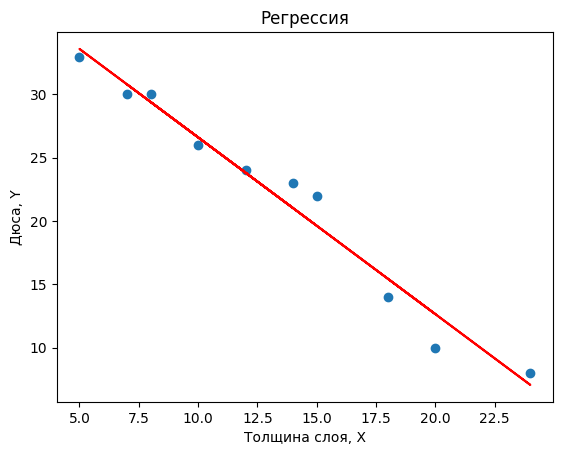

In [88]:

func(base2 ,'Толщина слоя, X', 'Дюса, Y','Регрессия',with_line=1)


# Задание 4
А). Имеются данные по двум экономическим показателям X и Y. Необходимо:
- Вычислить коэффициент корреляции.
- Построить корреляционное поле.
- Построить регрессионную модель

In [89]:
pred_base4a = {
    'Цена(X)': [997, 987, 1002, 1012, 1011, 1017, 978, 997, 1010, 989],
    'Спрос(Y)': [120, 140, 115, 100, 100, 90, 150, 140, 95, 155]
}
base4a = pd.DataFrame(pred_base4a)
base4a

,Цена(X),Спрос(Y)
0,997,120
1,987,140
2,1002,115
3,1012,100
4,1011,100
5,1017,90
6,978,150
7,997,140
8,1010,95
9,989,155


Кф корреляции равен:  -0.938523317014122
Регрессионная модель: y = -1.789655172413793*x + 1910.155172413793


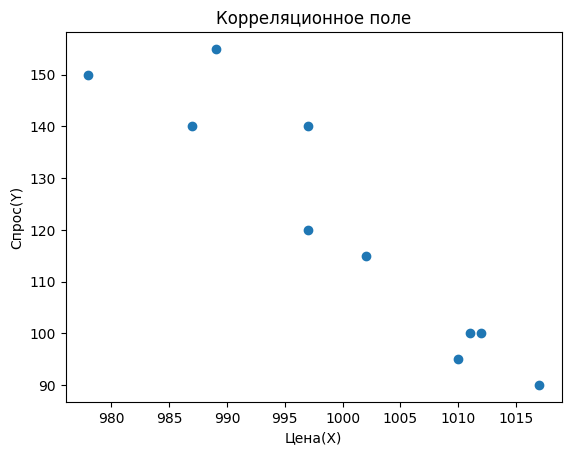

In [90]:
func(base4a, *pred_base4a.keys(),'Корреляционное поле')

Б). Установить, зависит ли количество посетителей музея и посетителей парка от числа ясных дней
за определенный период. Для этого:
- Вычислить коэффициенты корреляции.
- Построить корреляционное поле.
- Построить регрессионную модель (графическим способом и с помощью инструмента
Регрессия).

In [91]:
pred_base4b = {
    'Число ясных дней(Х)': [8, 14, 20, 25, 20, 15],
    'Количество посетителей музея(Y)': [495, 504, 380, 305, 348, 465],
    'Количество посетителей парка(Y)': [132, 348, 643, 865, 743, 541]
}
base4b = pd.DataFrame(pred_base4b)
base4b

,Число ясных дней(Х),Количество посетителей музея(Y),Количество посетителей парка(Y)
0,8,495,132
1,14,504,348
2,20,380,643
3,25,305,865
4,20,348,743
5,15,465,541


Кф корреляции равен:  -0.9207393698358727
Регрессионная модель: y = -12.914772727272727*x + 635.717803030303


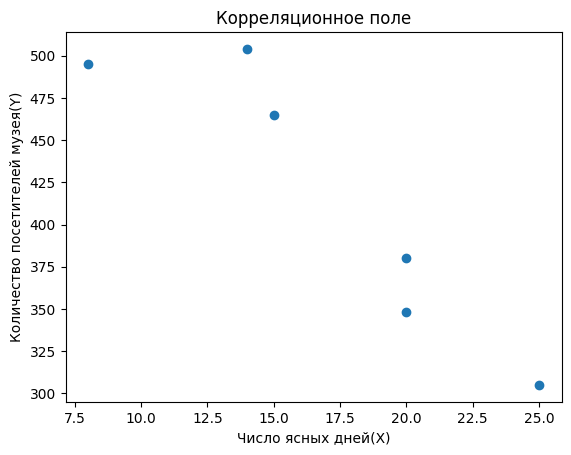

In [92]:
func(base4b, list(pred_base4b.keys())[0], list(pred_base4b.keys())[1],'Корреляционное поле')

Кф корреляции равен:  0.9745755882322944
Регрессионная модель: y = 44.11363636363637*x + -204.598484848485


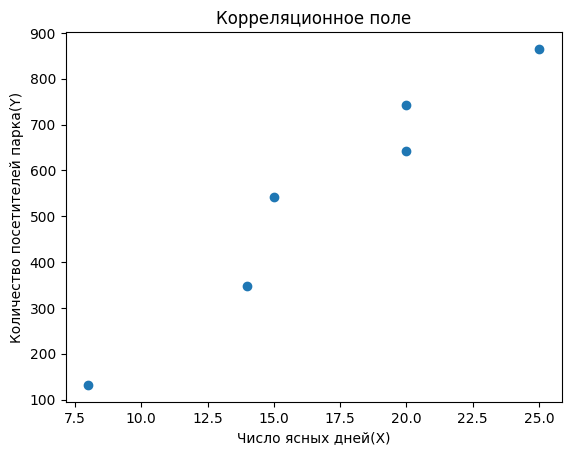

In [93]:
func(base4b, list(pred_base4b.keys())[0], list(pred_base4b.keys())[2],'Корреляционное поле')